In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("social_network_ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.drop(["User ID"], axis=1, inplace=True)

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
data.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [10]:
data.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


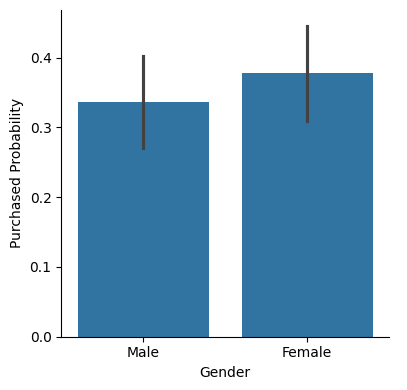

In [12]:
g= sns.catplot(x= "Gender", y="Purchased", data= data, kind= "bar", height=4)
g.set_ylabels("Purchased Probability")
plt.show()

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


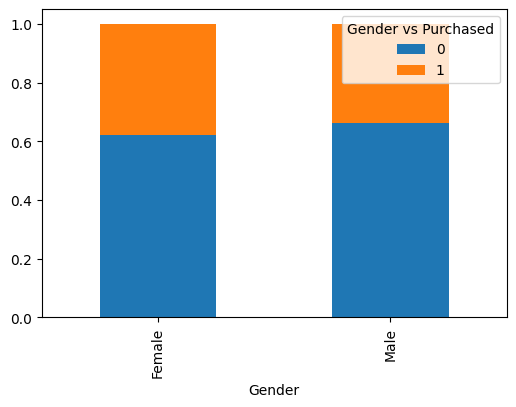

In [17]:
M2= pd.crosstab(data.Gender, data.Purchased, normalize='index')
print(M2)
M2.plot.bar(figsize=(6,4), stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

In [16]:
data_one_hot= pd.get_dummies(data, columns=["Gender"], drop_first=True)
numeric_data= data_one_hot.select_dtypes(include=['float64', 'int64'])
corr= numeric_data.corr()

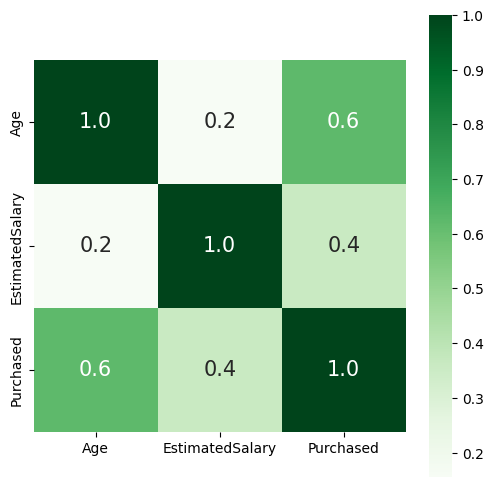

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [24]:
x=data.drop(['Gender', 'Purchased'], axis=1)
y=data['Purchased']
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train)*100)

83.75


In [28]:
y_pred= model.predict(x_test)
print(model.score(x_test, y_test)*100)

88.75


In [31]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
cm= confusion_matrix(y_test, y_pred)
print("confuision matrix: \n", cm)
var= precision_recall_fscore_support(y_test, y_pred)
print("precision: ", var[0])
print("recall: ", var[1])
print("fscore: ", var[2])
print("support: ", var[3])

confuision matrix: 
 [[50  2]
 [ 7 21]]
precision:  [0.87719298 0.91304348]
recall:  [0.96153846 0.75      ]
fscore:  [0.91743119 0.82352941]
support:  [52 28]
